In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import warnings
warnings.filterwarnings("ignore")

Data set

In [ ]:
#clean dataset of 253,680 survey responses to the CDC - 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes.

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1kgPd5ALglqGlR262RufrLhXmreNXfr_C979EpLB49lc/gviz/tq?tqx=out:csv'
data = pd.read_csv(url)

In [ ]:
print(data)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0                  0       1         1          1   40       1       0   
1                  0       0         0          0   25       1       0   
2                  0       1         1          1   28       0       0   
3                  0       1         0          1   27       0       0   
4                  0       1         1          1   24       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
253675             0       1         1          1   45       0       0   
253676             2       1         1          1   18       0       0   
253677             0       0         0          1   28       0       0   
253678             0       1         0          1   23       0       0   
253679             2       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                          0         

EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
data.shape

(253680, 22)

In [ ]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
print(data.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [ ]:
#transform data to integer
data["Diabetes_012"] = data["Diabetes_012"].astype(int)
data["HighBP"] = data["HighBP"].astype(int)
data["HighChol"] = data["HighChol"].astype(int)
data["CholCheck"] = data["CholCheck"].astype(int)
data["BMI"] = data["BMI"].astype(int)
data["Smoker"] = data["Smoker"].astype(int)
data["Stroke"] = data["Stroke"].astype(int)
data["HeartDiseaseorAttack"] = data["HeartDiseaseorAttack"].astype(int)
data["PhysActivity"] = data["PhysActivity"].astype(int)
data["Fruits"] = data["Fruits"].astype(int)
data["Veggies"] = data["Veggies"].astype(int)
data["HvyAlcoholConsump"] = data["HvyAlcoholConsump"].astype(int)
data["AnyHealthcare"] = data["AnyHealthcare"].astype(int)
data["NoDocbcCost"] = data["NoDocbcCost"].astype(int)
data["GenHlth"] = data["GenHlth"].astype(int)
data["MentHlth"] = data["MentHlth"].astype(int)
data["PhysHlth"] = data["PhysHlth"].astype(int)
data["DiffWalk"] = data["DiffWalk"].astype(int)
data["Sex"] = data["Sex"].astype(int)
data["Age"] = data["Age"].astype(int)
data["Education"] = data["Education"].astype(int)
data["Income"] =data["Income"].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [ ]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        print(f"Column '{column}' is non-numeric.")

In [ ]:
# data = data.drop('Diabetes_012_str', axis=1)

In [ ]:
#checking unique values
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Diabetes_012,3
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


In [ ]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
#function to view the value counts for the whole data
def v_counts(dataframe):
    for i in dataframe :
        print(dataframe[i].value_counts())
        print("_____________________________________________________________________________")

In [ ]:
v_counts(data)

0    213703
2     35346
1      4631
Name: Diabetes_012, dtype: int64
_____________________________________________________________________________
0    144851
1    108829
Name: HighBP, dtype: int64
_____________________________________________________________________________
0    146089
1    107591
Name: HighChol, dtype: int64
_____________________________________________________________________________
1    244210
0      9470
Name: CholCheck, dtype: int64
_____________________________________________________________________________
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: BMI, Length: 84, dtype: int64
_____________________________________________________________________________
0    141257
1    112423
Name: Smoker, dtype: int64
_____________________________________________________________________________
0    243388
1     10292
Name: Stroke, dtype: int64
___________________________________

In [ ]:
##Replacing 0 into Non-Diabetic and 1 into Prediabetic and 2 for Diabetic
#adding new column Diabetes_binary_str
data["Diabetes_012_str"]= data["Diabetes_012"].replace({0:"NonDiabetic",1:"Prediabetic",2:"Diabetic"})

In [ ]:
data

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012_str
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,NonDiabetic
1,0,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,NonDiabetic
2,0,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,NonDiabetic
3,0,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,NonDiabetic
4,0,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,NonDiabetic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,45,0,0,0,0,1,...,0,3,0,5,0,1,5,6,7,NonDiabetic
253676,2,1,1,1,18,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,Diabetic
253677,0,0,0,1,28,0,0,0,1,1,...,0,1,0,0,0,0,2,5,2,NonDiabetic
253678,0,1,0,1,23,0,0,0,0,1,...,0,3,0,0,0,1,7,5,1,NonDiabetic


**Feature Engineering**

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

features = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
            'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
            'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

# Calculating VIF
X = data[features]
X = add_constant(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                 Feature         VIF
0                  const  115.971455
1                 HighBP    1.330684
2               HighChol    1.173313
3              CholCheck    1.032822
4                    BMI    1.139724
5                 Smoker    1.091787
6                 Stroke    1.081070
7   HeartDiseaseorAttack    1.171917
8           PhysActivity    1.157311
9                 Fruits    1.112533
10               Veggies    1.112385
11     HvyAlcoholConsump    1.024059
12         AnyHealthcare    1.113104
13           NoDocbcCost    1.144158
14               GenHlth    1.795892
15              MentHlth    1.239297
16              PhysHlth    1.623288
17              DiffWalk    1.533902
18                   Sex    1.075060
19                   Age    1.349994
20             Education    1.326390
21                Income    1.503931


Based on traditional VIF thresholds, none of the features need to be removed for multicollinearity reasons. All features have VIF values less than 5, suggesting that they can be retained without concerns about severe multicollinearity affecting the regression coefficients.

In [ ]:
import statsmodels.api as sm
import pandas as pd


In [ ]:
X=data.drop("Diabetes_012",axis=1)
y=data["Diabetes_012"]

In [ ]:
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(y, X).fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Diabetes_012   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     2520.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        06:40:51   Log-Likelihood:            -2.4477e+05
No. Observations:              253680   AIC:                         4.896e+05
Df Residuals:                  253658   BIC:                         4.898e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.6127 

Becuase the faetures: PhysHlth, Fruits, Veggies and NoDocbcCost have a p_value larger than 0.05, therefore we removed these 4 features.

**Dataset** **Split**

In [ ]:
# List of columns to be dropped
columns_to_drop = ['PhysHlth', 'Fruits', 'Veggies', 'NoDocbcCost']

# Drop the columns from the DataFrame
data = data.drop(columns_to_drop, axis=1)


In [68]:
# data = data.drop('Diabetes_012_str', axis=1)

In [ ]:
X=data.drop("Diabetes_012",axis=1)
y=data["Diabetes_012"]

In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'GenHlth', 'MentHlth', 'DiffWalk', 'Sex', 'Age',
       'Education', 'Income'],
      dtype='object')

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_scaled,y, test_size=0.3 , random_state=42)

Address the imbalance

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from collections import Counter

# # 1. Oversampling with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 2. Undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# Checking the new class distributions
class_distribution_smote = Counter(y_train_smote)
class_distribution_under = Counter(y_train_under)


# Outputs
(class_distribution_smote,class_distribution_under)


(Counter({2: 149523, 0: 149523, 1: 149523}),
 Counter({0: 3206, 1: 3206, 2: 3206}))

**LogisticRegression**

In [ ]:
log_reg = LogisticRegression(random_state=42,max_iter = 1500)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1500, random_state=42)

In [ ]:
y_pred=log_reg.predict(X_test)

print('Training set score: {:.4f}'.format(log_reg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(log_reg.score(X_test, y_test)))

Training set score: 0.8460
Test set score: 0.8478


In [ ]:
log_reg_smote = LogisticRegression(random_state=42,max_iter = 1500)
log_reg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1500, random_state=42)

In [ ]:
y_pred_smote=log_reg_smote.predict(X_test)

print('Training set score: {:.4f}'.format(log_reg_smote.score(X_train_smote, y_train_smote)))

print('Test set score: {:.4f}'.format(log_reg_smote.score(X_test, y_test)))

Training set score: 0.5199
Test set score: 0.6435


In [ ]:
log_reg_under = LogisticRegression(random_state=42,max_iter = 1500)
log_reg_under.fit(X_train_under, y_train_under)
y_pred_under=log_reg_under.predict(X_test)

print('Training set score: {:.4f}'.format(log_reg_under.score(X_train_under, y_train_under)))

print('Test set score: {:.4f}'.format(log_reg_under.score(X_test, y_test)))

Training set score: 0.5178
Test set score: 0.6439


In [ ]:
# 3. Balanced Class Weights in Logistic Regression
# This will automatically adjust weights inversely proportional to class frequencies
log_reg_bal = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1500)
log_reg_bal.fit(X_train, y_train)

# Make predictions on the training and test sets
y_pred_train_bal = log_reg_bal.predict(X_train)
y_pred_test_bal = log_reg_bal.predict(X_test)

# Calculate and print the scores for the training and test sets
print('Training set score: {:.4f}'.format(log_reg_bal.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(log_reg_bal.score(X_test, y_test)))



Training set score: 0.6479
Test set score: 0.6479


The best method to balance the class weight is to use class_weight='balanced' in LogisticRegression.




### K-Nearest Neighbors

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# find the optimal K

# import matplotlib.pyplot as plt

# # Array to store average scores
# avg_scores = []

# # Range of k to try
# k_range = range(1,31)

# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
#     avg_scores.append(scores.mean())

# # Plotting the results
# plt.plot(k_range, avg_scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Cross-Validated Accuracy')
# plt.show()



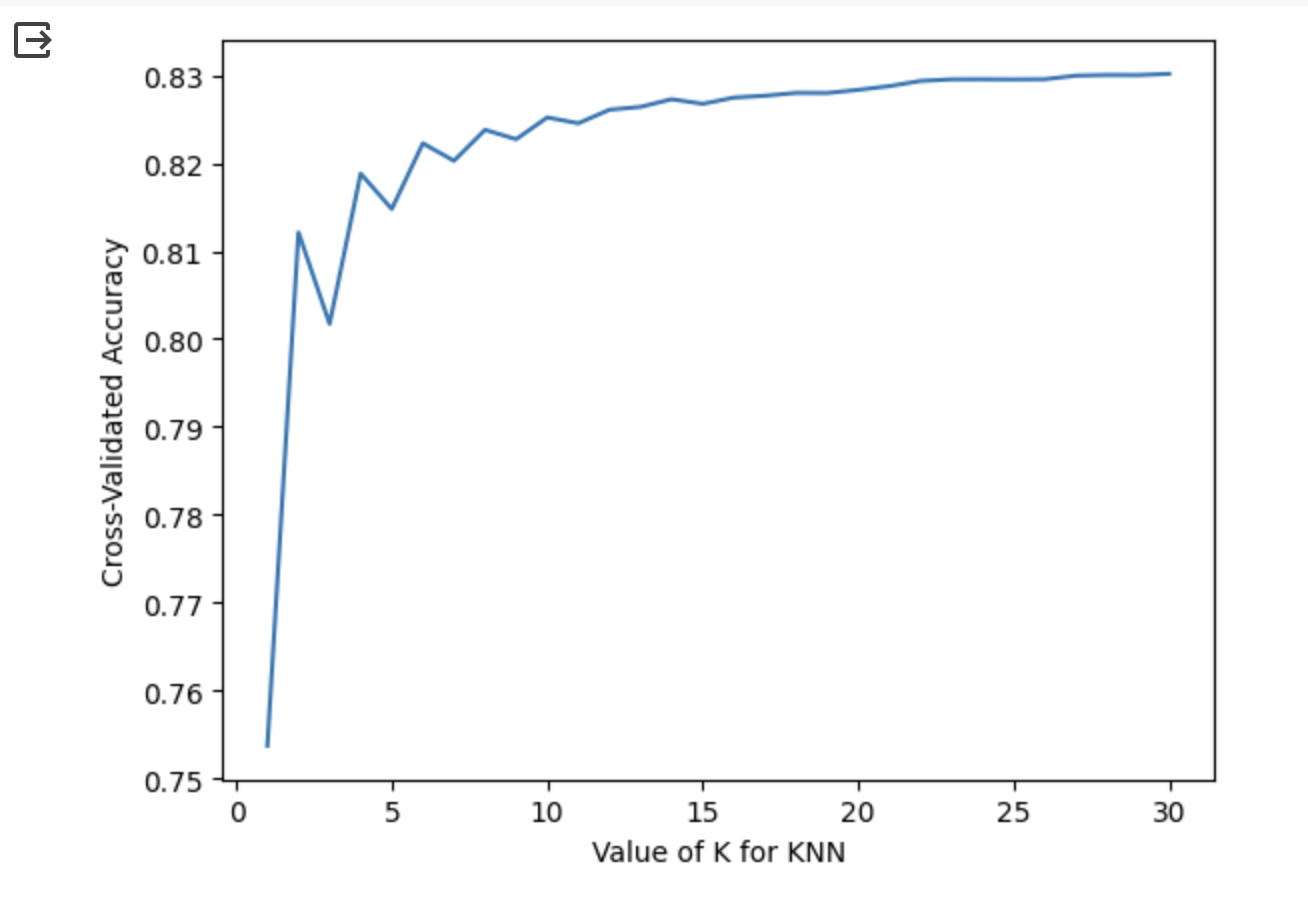

When choosing the best k for kNN, we typically look for a value that maximizes the cross-validated accuracy without overfitting. Based on the plot, the accuracy seems to plateau after k reaches around 10, suggesting that additional increases in k do not lead to significant improvements in accuracy. Thus, a k value of 10  could be a good choice for this model.

In [69]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use the optimal k as 10 to initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [70]:
# Predict and evaluate the model
y_pred_knn = knn.predict(X_test_scaled)


In [71]:
# Evaluate the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Evaluate the model for multiclass classification
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn, average='weighted')
recall = recall_score(y_test, y_pred_knn, average='weighted')
f1 = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.8410070429937979
Precision: 0.7910183854177757
Recall: 0.8410070429937979
F1 Score: 0.79998163338087
Confusion Matrix:
 [[62474     0  1706]
 [ 1320     1   104]
 [ 8966     4  1529]]


In [72]:
#Confusion matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[62474     0  1706]
 [ 1320     1   104]
 [ 8966     4  1529]]
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     64180
           1       0.20      0.00      0.00      1425
           2       0.46      0.15      0.22     10499

    accuracy                           0.84     76104
   macro avg       0.51      0.37      0.38     76104
weighted avg       0.79      0.84      0.80     76104



In [73]:
from sklearn.metrics import mean_squared_error , accuracy_score

In [74]:
# mse & rmse
mse = mean_squared_error(y_test, y_pred_knn)
print('Mean Squared Error : '+ str(mse))
rmse = math.sqrt(mean_squared_error(y_test, y_pred_knn))
print('Root Mean Squared Error : '+ str(rmse))

Mean Squared Error : 0.5796804372963313
Root Mean Squared Error : 0.7613674784861324


### *K-nearest Neighbors Classification with cross validation and Smote¶*

In [75]:
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# scaler = MinMaxScaler()

# X_train_scaled = scaler.fit_transform(X_train_smote)

# X_test_scaled = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train_smote)


In [76]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd

# Initialize KFold and KNN classifier
kf = KFold(n_splits=5, random_state=42, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=10)

accuracy_score1 = []
f1_score1 = []
precision_score1 = []
recall_score1 = []


for train_ix, test_ix in kf.split(X, y):
    train_X, test_X = X.iloc[train_ix], X.iloc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]

    smote = SMOTE(random_state=0)
    train_X, train_y = smote.fit_resample(train_X, train_y)

    # Scale the data using MinMaxScaler()
    scaler = MinMaxScaler()
    train_X_scaled = scaler.fit_transform(train_X)
    test_X_scaled = scaler.transform(test_X)

    knn.fit(train_X_scaled, train_y)
    y_pred = knn.predict(test_X_scaled)

    accuracy_score1.append(metrics.accuracy_score(test_y, y_pred))
    precision_score1.append(metrics.precision_score(test_y, y_pred, average='macro'))
    recall_score1.append(metrics.recall_score(test_y, y_pred, average='macro'))
    f1_score1.append(metrics.f1_score(test_y, y_pred, average='macro'))


print("KNN accuracy score: \t", sum(accuracy_score1) / len(accuracy_score1))
print("KNN F1 score: \t", sum(f1_score1) / len(f1_score1))
print("KNN precision score: \t", sum(precision_score1) / len(precision_score1))
print("KNN recall score: \t", sum(recall_score1) / len(recall_score1))

# Confusion matrix for the last fold
conf_mat3 = confusion_matrix(test_y, y_pred)
print("KNN confusion matrix: \n", conf_mat3)



KNN accuracy score: 	 0.6266240933459476
KNN F1 score: 	 0.39102686966651434
KNN precision score: 	 0.4068032126322838
KNN recall score: 	 0.4585418193841586
KNN confusion matrix: 
 [[28007  5647  9095]
 [  394   178   360]
 [ 2239  1114  3702]]
